In [1]:
import tensorflow as tf 
import cv2
import os
import numpy as np 
import pandas as pd
from tqdm import tqdm
from sklearn.utils import shuffle
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import matplotlib.pylab as plt
from sklearn.metrics import confusion_matrix


##### Visualize the data
We can display a random image from the training set.

Image shape :(150, 150, 3)
[[[ 65 105 140]
  [ 66 104 141]
  [ 71 102 149]
  ...
  [ 62  54  35]
  [173 165 146]
  [205 197 178]]

 [[ 66 106 141]
  [ 67 105 142]
  [ 71 102 148]
  ...
  [120 112  93]
  [180 171 154]
  [218 210 191]]

 [[ 65 105 140]
  [ 66 104 141]
  [ 70 103 146]
  ...
  [130 121 104]
  [162 153 138]
  [198 189 172]]

 ...

 [[ 61  66  62]
  [ 43  44  38]
  [146 138 127]
  ...
  [ 94  78  63]
  [171 159 145]
  [181 171 159]]

 [[ 43  48  44]
  [ 50  51  45]
  [155 147 136]
  ...
  [ 89  76  60]
  [174 162 150]
  [191 181 171]]

 [[ 62  67  63]
  [ 78  79  73]
  [169 159 149]
  ...
  [ 94  81  65]
  [173 161 149]
  [194 184 174]]]
shape of image is : (150, 150, 3)


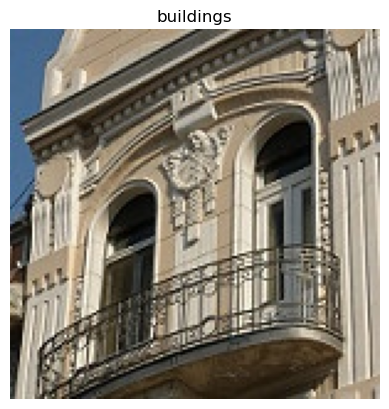

In [2]:
# Aim : define a function to show image along side with its shape
import matplotlib.pyplot as plt 
import random
import os
import matplotlib.image as mpimg

# 1st step : choose an image randomely ( random.sample )
# 2st step : read image file that we choose in 1st step & return the image data as a NumPy array.
# 3th step : Now visualize image using plt

def display_image (directory , className):

 random_image = random.sample (os.listdir(directory + className) , 1) # to obtain a list of paths.
 image = mpimg.imread(directory + className + "/" + random_image[0] ) # read an image file into a NumPy array
 plt.imshow(image)
 plt.title(className) 
 plt.axis('off')
 print(f"Image shape :{image.shape}")
 return image

img=display_image(directory='seg_train/seg_train/' , className="buildings")
print(img)
print(f"shape of image is : {img.shape}")

In [3]:
train = tf.keras.preprocessing.image_dataset_from_directory(directory='seg_train/seg_train/',
                                                            image_size=(150,150),
                                                            label_mode='categorical',
                                                            batch_size=32)

test = tf.keras.preprocessing.image_dataset_from_directory(directory='seg_test/seg_test/',
                                                           image_size=(150,150),
                                                           label_mode='categorical',
                                                            batch_size= 32)

Found 14034 files belonging to 6 classes.
Found 3000 files belonging to 6 classes.


In [4]:
ClassName = train.class_names
print(ClassName)
print(train.element_spec)
# Check shape of test and train data
for image,label in train.take(1):
    print("Image batch shape:", image.shape)
    print("Label batch shape:", label.shape)

['buildings', 'forest', 'glacier', 'mountain', 'sea', 'street']
(TensorSpec(shape=(None, 150, 150, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None, 6), dtype=tf.float32, name=None))
Image batch shape: (32, 150, 150, 3)
Label batch shape: (32, 6)


In [9]:
data_augmentation = tf.keras.Sequential([
    layers.RandomFlip('horizontal'),
    layers.RandomRotation(0.2),
    layers.RandomZoom(0.2),
    layers.RandomHeight(0.2),
    layers.RandomWidth(0.2)])

In [10]:
# Model using Feature Extraction
base_model = tf.keras.applications.efficientnet_v2.EfficientNetV2B0(include_top=False)

base_model.trainable = False # Freeze the base model (so the pre-learned patterns remain)
Input = tf.keras.layers.Input(shape = (150,150,3))
x = data_augmentation(Input)
x = base_model(x, training=False)
x = tf.keras.layers.GlobalAveragePooling2D()(x)
output =tf.keras.layers.Dense(6,activation='softmax')(x)

model = tf.keras.Model(Input,output)
model.compile(loss = 'categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

history = model.fit(train, epochs = 5 , validation_data=test)

Epoch 1/5
439/439 [==============================] - 77s 167ms/step - loss: 0.5524 - accuracy: 0.8046 - val_loss: 0.3202 - val_accuracy: 0.8827
Epoch 2/5
439/439 [==============================] - 80s 181ms/step - loss: 0.3843 - accuracy: 0.8594 - val_loss: 0.2989 - val_accuracy: 0.8890
Epoch 3/5
439/439 [==============================] - 78s 179ms/step - loss: 0.3600 - accuracy: 0.8655 - val_loss: 0.2817 - val_accuracy: 0.8987
Epoch 4/5
439/439 [==============================] - 81s 184ms/step - loss: 0.3319 - accuracy: 0.8804 - val_loss: 0.2730 - val_accuracy: 0.8997
Epoch 5/5
439/439 [==============================] - 80s 182ms/step - loss: 0.3260 - accuracy: 0.8809 - val_loss: 0.2601 - val_accuracy: 0.9067


94/94 [==============================] - 13s 141ms/step - loss: 0.2601 - accuracy: 0.9067
Loss : 26.0% , Accuracy:90.7%


<Axes: >

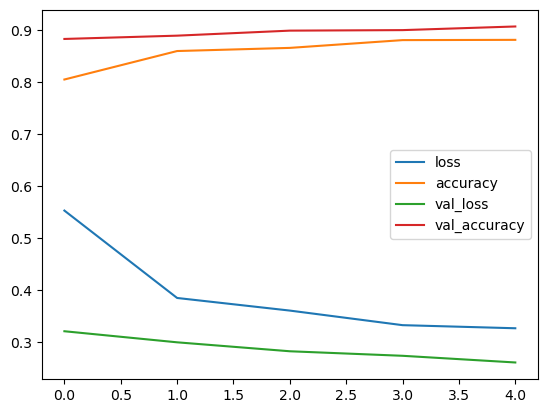

In [11]:
import pandas as pd
evaluate_test = model.evaluate(test, verbose=1)
print(f'Loss : {evaluate_test[0]*100:.1f}% , Accuracy:{evaluate_test[1]*100:.1f}%')
pd.DataFrame(history.history).plot()

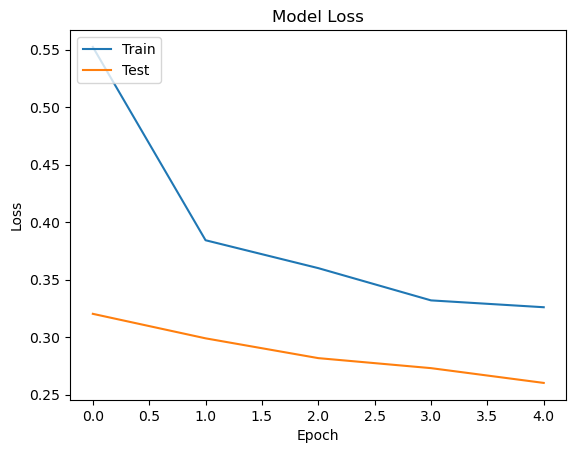

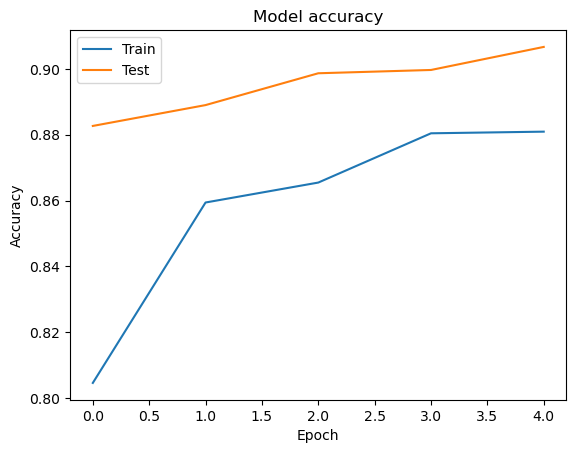

In [12]:
history_data = pd.DataFrame(history.history)

def plot_accuracy_loss(history):

    plt.plot(history_data['loss'])
    plt.plot(history_data['val_loss'])
    plt.title('Model Loss')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Test'], loc='upper left')
    plt.show()

    plt.plot(history_data['accuracy'])
    plt.plot(history_data['val_accuracy'])
    plt.title('Model accuracy')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Test'], loc='upper left')
    plt.show()

plot_accuracy_loss(history=history_data)    

1/1 [==============================] - 0s 19ms/step


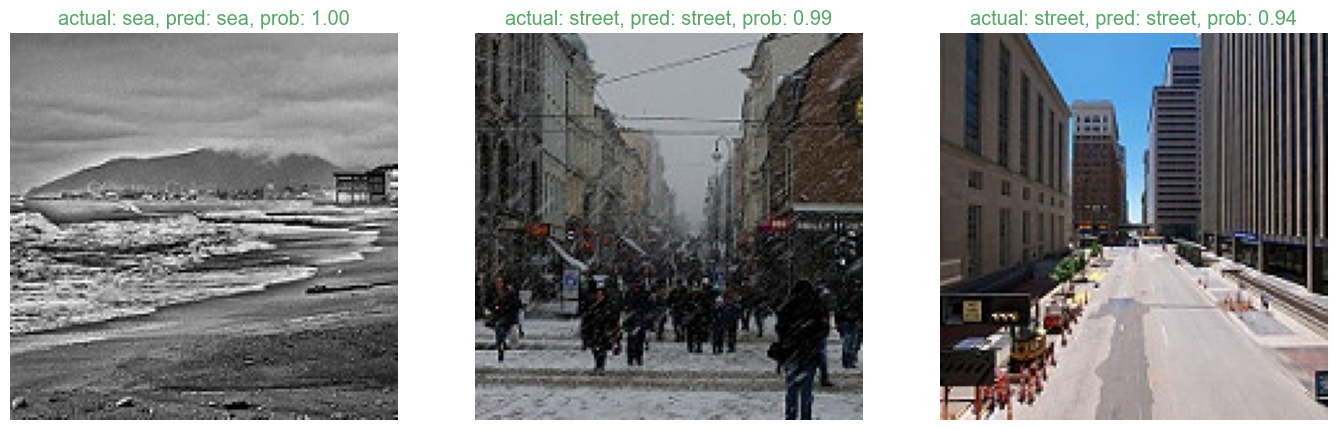

In [33]:
test_dir = 'seg_test/seg_test/'
class_names = train.class_names
plt.figure(figsize=(17, 10))
for i in range(3):
   random_class = np.random.choice(train.class_names)
   img_list = np.random.choice(os.listdir(test_dir + random_class))
   path_join = os.path.join(test_dir,random_class,img_list)
   image = mpimg.imread(path_join)
   pred_prob = model.predict(tf.expand_dims(image, axis=0))
   pred_label = class_names[pred_prob.argmax()]
    # Plot the image(s)
   plt.subplot(1, 3, i+1)
   plt.imshow(image/255.)
   if random_class == pred_label: # Change the color of text based on whether prediction is right or wrong
       title_color = "g"
   else:
       title_color = "r"
   plt.title(f"actual: {random_class}, pred: {pred_label}, prob: {pred_prob.max():.2f}", c=title_color)
   plt.axis(False)
     

In [14]:
prediction_prob = model.predict(test)# Vector of probabilities
pred_label = np.argmax(prediction_prob, axis=1)  
print(pred_label)
y_true = np.concatenate([label for image, label in test], axis=0)  
y_true = np.argmax(y_true, axis=1)
print(y_true)

94/94 [==============================] - 13s 126ms/step
[0 3 5 ... 0 0 0]
[2 1 4 ... 2 0 3]


In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns ; sns.set(font_scale=1.4)
maped_pred = [class_names[i] for i in pred_label]
maped_y_true = [class_names[i] for i in y_true]

CM = confusion_matrix(maped_pred, maped_y_true , labels=class_names)
print(CM)
plt.figure(figsize=(8, 6))
sns.set(font_scale=1.2) # for label size
sns.heatmap(CM, annot=True, fmt='d', cmap='Blues', 
            xticklabels=class_names, yticklabels=class_names)

# Adding titles and labels
plt.title('Confusion Matrix')
plt.xlabel('Predicted Classes')
plt.ylabel('True Classes')
plt.show()

In [22]:
# which kind of images the classifier has trouble.
mislabeled = (y_true == pred_label)
print(mislabeled)
series = pd.Series(mislabeled)
mislabeled_indices = pd.value_counts(series)
print(mislabeled_indices)

[False False False ... False  True False]
False    2481
True      519
Name: count, dtype: int64


/var/folders/76/1yzscp4d71l1rljcgf5sbbfm0000gn/T/ipykernel_17817/2819355492.py:5: FutureWarning: pandas.value_counts is deprecated and will be removed in a future version. Use pd.Series(obj).value_counts() instead.
  mislabeled_indices = pd.value_counts(series)


In [23]:
# Load pred data .(In pred data we do not have label)
path = 'seg_pred/seg_pred/'
predFile=[]
for imageFile in os.listdir(path):
    image_path = os.path.join(path, imageFile)
    img = cv2.imread(image_path)
    img = cv2.resize(img, (150, 150))
    predFile.append(img)

predFile = np.array(predFile)
predFile.shape
#plt.imshow(predFile[4])


(7301, 150, 150, 3)

In [24]:
# prediction
prediction_prob = model.predict(predFile)

229/229 [==============================] - 29s 123ms/step


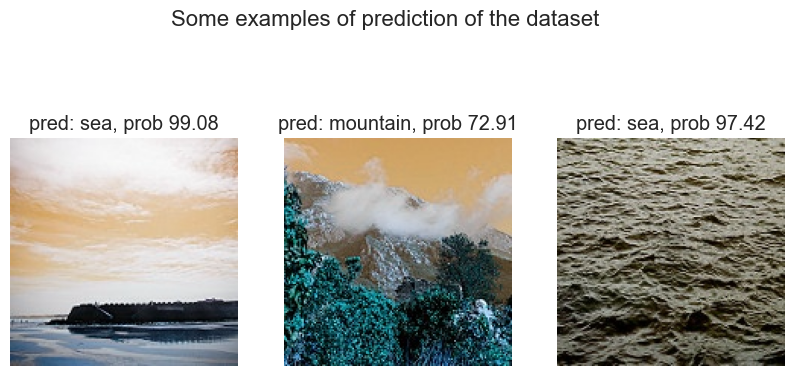

In [35]:
i=0
fig , axes = plt.subplots(1,3, figsize=(10, 5))
fig.suptitle("Some examples of prediction of the dataset", fontsize=16)

axes = axes.flatten()
for index in np.random.choice(len(predFile),3) :
    axes[i].imshow(predFile[index])
    axes[i].set_title(f'pred: {class_names[np.argmax(prediction_prob[index])]}, prob {round(prediction_prob[index].max()*100 , 2)}')
    axes[i].axis(False)
    i+=1